In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
from keras.layers import Input, Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers.merge import concatenate
from keras.preprocessing import image
from keras.models import Model
import keras.backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Input Image

(360, 480, 3)


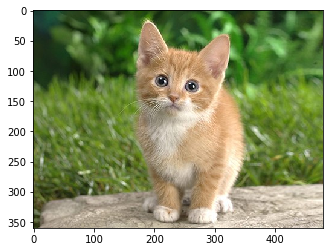

In [2]:
img = image.load_img("cat.jpg")
plt.imshow(img);

X = np.array(img, dtype="uint8")
print X.shape

## Conv2D

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 360, 480, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 358, 478, 1)       28        
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
Shape: (1, 358, 478, 1)
Range: -71.1719 254.548


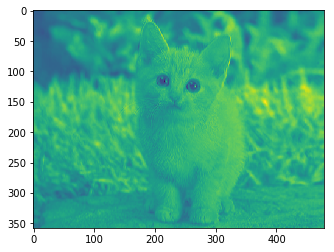

In [3]:
# construct model
input_tensor = Input(shape=(360, 480, 3))
output = Conv2D(filters=1, kernel_size=(3, 3), padding="valid", dilation_rate=(1, 1))(input_tensor)
model = Model(input_tensor, output)

# display architecture
model.summary()

# show image
y = model.predict(X[np.newaxis,:,:,:])
print "Shape:", y.shape
print "Range:", y.min(), y.max()
plt.imshow(y[0,:,:,0]);

# MaxPooling2D

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 360, 480, 3)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 72, 96, 3)         0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
Shape: (1, 72, 96, 3)
Range: 6.0 255.0


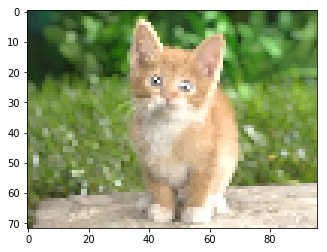

In [4]:
# construct model
input_tensor = Input(shape=(360, 480, 3))
output = MaxPooling2D(pool_size=(5, 5), strides=(5, 5))(input_tensor)
model = Model(input_tensor, output)

# display architecture
model.summary()

# show image
y = model.predict(X[np.newaxis,:,:,:])
print "Shape:", y.shape
print "Range:", y.min(), y.max()
plt.imshow(255*y[0]);

## ZeroPadding2D

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 360, 480, 3)       0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 380, 500, 3)       0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
Shape: (1, 380, 500, 3)
Range: 0.0 255.0


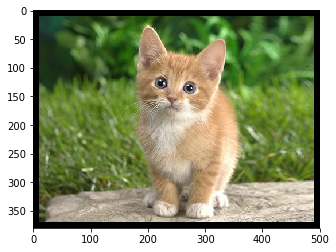

In [5]:
# construct model
input_tensor = Input(shape=(360, 480, 3))
output = ZeroPadding2D(padding=(10, 10))(input_tensor)
model = Model(input_tensor, output)

# display architecture
model.summary()

# show image
y = model.predict(X[np.newaxis,:,:,:])
print "Shape:", y.shape
print "Range:", y.min(), y.max()
plt.imshow(255*y[0]);

## GlobalAveragePooling2D

In [6]:
# construct model
input_tensor = Input(shape=(360, 480, 3))
output = GlobalAveragePooling2D()(input_tensor)
model = Model(input_tensor, output)

# display architecture
model.summary()

# show image
y = model.predict(X[np.newaxis,:,:,:])
print "Shape:", y.shape
print "Range:", y.min(), y.max()
print "Output:", y

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 360, 480, 3)       0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 3)                 0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
Shape: (1, 3)
Range: 85.64 135.985
Output: [[ 125.74012756  135.98480225   85.64000702]]


## Flatten

In [7]:
# construct model
input_tensor = Input(shape=(360, 480, 3))
output = Flatten()(input_tensor)
model = Model(input_tensor, output)

# display architecture
model.summary()

# show image
y = model.predict(X[np.newaxis,:,:,:])
print "Shape:", y.shape
print "Range:", y.min(), y.max()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 360, 480, 3)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 518400)            0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
Shape: (1, 518400)
Range: 0.0 255.0


## Concatenate

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 360, 480, 3)  0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 720, 480, 3)  0           input_6[0][0]                    
                                                                 input_6[0][0]                    
Total params: 0
Trainable params: 0
Non-trainable params: 0
__________________________________________________________________________________________________
Shape: (1, 720, 480, 3)
Range: 0.0 255.0


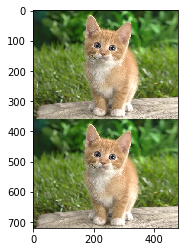

In [8]:
# construct model
input_tensor = Input(shape=(360, 480, 3))
output = concatenate([input_tensor, input_tensor], axis=1)
model = Model(input_tensor, output)

# display architecture
model.summary()

# show image
y = model.predict(X[np.newaxis,:,:,:])
print "Shape:", y.shape
print "Range:", y.min(), y.max()
plt.imshow(255*y[0]);